In [1]:
# 导入 pandas

import re
import pandas as pd

In [2]:
# 读入 csv 文件为 dataframe 

df = pd.read_csv('esf.csv')
df.head()

,agent,bathrooms,building_area,building_name,building_type,decor,elevator,floor_position,link,livingrooms,orientation,price_per_m2,property,region,rooms,school,section,structure,total_price,year
0,誉辉地产,2,116.0,合景誉山国际 地图,普通住宅,豪华装修,有,中层,http://esf.gz.fang.com/chushou/3_215548861.htm,2,南北,16250.0,个人产权,增城,3,NaN,永和,NaN,188.5,2012.0
1,合赢地产,3,282.0,时代南湾 地图,豪宅,毛坯,有,低层,http://esf.gz.fang.com/chushou/3_202238124.htm,2,南北,19858.0,个人产权,南沙,4,NaN,旧镇,平层,560.0,2015.0
2,扬帆地产,2,86.0,三水御江南 地图,普通住宅,精装修,有,中层,http://esf.gz.fang.com/chushou/3_220677269.htm,2,东南,9884.0,商品房,广州周边,3,NaN,佛山,平层,85.0,2009.0
3,裕丰地产,1,52.0,和风雅居 (距1号线杨箕站约207米) 地图,普通住宅,精装修,有,高层,http://esf.gz.fang.com/chushou/3_220723405.htm,1,西,90385.0,个人产权,越秀,1,育才小学,杨箕,NaN,470.0,2002.0
4,正富地产,1,80.0,华天国际广场 (距3号线华师站约478米) 地图,普通住宅,精装修,无,中层,http://esf.gz.fang.com/chushou/3_219212951.htm,2,南,50000.0,个人产权,天河,2,NaN,五山路口,平层,400.0,1995.0


In [3]:
# 去掉无关的 column

df.drop(['agent', 'link', 'property', 'section', 'building_type'], axis=1, inplace=True)
df.head()

,bathrooms,building_area,building_name,decor,elevator,floor_position,livingrooms,orientation,price_per_m2,region,rooms,school,structure,total_price,year
0,2,116.0,合景誉山国际 地图,豪华装修,有,中层,2,南北,16250.0,增城,3,NaN,NaN,188.5,2012.0
1,3,282.0,时代南湾 地图,毛坯,有,低层,2,南北,19858.0,南沙,4,NaN,平层,560.0,2015.0
2,2,86.0,三水御江南 地图,精装修,有,中层,2,东南,9884.0,广州周边,3,NaN,平层,85.0,2009.0
3,1,52.0,和风雅居 (距1号线杨箕站约207米) 地图,精装修,有,高层,1,西,90385.0,越秀,1,育才小学,NaN,470.0,2002.0
4,1,80.0,华天国际广场 (距3号线华师站约478米) 地图,精装修,无,中层,2,南,50000.0,天河,2,NaN,平层,400.0,1995.0


In [4]:
# 查看数据的形状 (多少行, 多少列)

df.shape

(7467, 15)

In [5]:
# 查看哪些 column 含有 nan 空数据 (这是因为抓取时出错了或是网页本身就没有提供, 这种情况并不少见), 需要补全 
# 否则在训练模型时会产生奇怪的问题 (!! 非常重要 !!)

df.isnull().any()

bathrooms         False
building_area     False
building_name     False
decor             False
elevator           True
floor_position    False
livingrooms       False
orientation       False
price_per_m2      False
region            False
rooms             False
school             True
structure          True
total_price       False
year               True
dtype: bool

In [6]:
# 对存在 nan 的列进行补全, 使用 fillna 方法

df.elevator.fillna(value='无', inplace=True)
df.school.fillna(value='无', inplace=True)
df.structure.fillna(value='无', inplace=True)
df.year.fillna(value=0.0, inplace=True)

# 再确认下是否还存在 nan 的列
df.isnull().any()

bathrooms         False
building_area     False
building_name     False
decor             False
elevator          False
floor_position    False
livingrooms       False
orientation       False
price_per_m2      False
region            False
rooms             False
school            False
structure         False
total_price       False
year              False
dtype: bool

In [7]:
# dataframe 的 describe 方法, 可以大略检查数据的分布情况

df.describe()

,bathrooms,building_area,livingrooms,price_per_m2,rooms,total_price,year
count,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000,7467.000000
mean,1.596893,104.622920,1.787733,29479.580688,2.791349,337.619942,1964.980046
std,0.850352,74.272245,0.487804,20623.371363,1.033521,494.891506,286.212866
min,0.000000,3.000000,0.000000,3814.000000,0.000000,10.000000,0.000000
25%,1.000000,72.000000,2.000000,16201.500000,2.000000,128.000000,2000.000000
50%,1.000000,90.000000,2.000000,25153.000000,3.000000,216.000000,2007.000000
75%,2.000000,112.000000,2.000000,37704.500000,3.000000,360.000000,2013.000000
max,9.000000,2030.000000,5.000000,500000.000000,9.000000,16000.000000,2021.000000


In [8]:
# 从上面的结果可以看到 price_per_m2 (每平米价格) 这个列最大值为 500000
# building_area (建筑面积) 这个列最小值为 3
# 这种离群点我们去掉, 能提高模型的准确性

df = df[df['price_per_m2'] < 200000]
df = df[df['building_area'] > 10]
df.shape

(7457, 15)

In [9]:
# building_name 这个列含有 地铁线路 信息, 我们把它抽取出来

def get_metro_line(x):
    p = re.search(r'(\d+)号线', x)
    return int(p.group(1)) if p else 0
df['metro_line'] = df.building_name.apply(get_metro_line)

# 然后可以将 building_name 去掉了, 这个列无关性较大
df.drop(['building_name'], axis=1, inplace=True)

df.head()

,bathrooms,building_area,decor,elevator,floor_position,livingrooms,orientation,price_per_m2,region,rooms,school,structure,total_price,year,metro_line
0,2,116.0,豪华装修,有,中层,2,南北,16250.0,增城,3,无,无,188.5,2012.0,0
1,3,282.0,毛坯,有,低层,2,南北,19858.0,南沙,4,无,平层,560.0,2015.0,0
2,2,86.0,精装修,有,中层,2,东南,9884.0,广州周边,3,无,平层,85.0,2009.0,0
3,1,52.0,精装修,有,高层,1,西,90385.0,越秀,1,育才小学,无,470.0,2002.0,1
4,1,80.0,精装修,无,中层,2,南,50000.0,天河,2,无,平层,400.0,1995.0,3


In [10]:
# 这里主要是进行文字到数字的转换, 模型只认数字

data = df

# school 和 elevator 这两列, 有 -> 1; 无 -> 0
data['school'] = data.school.apply(lambda x: 0 if x == '无' else 1)
data['elevator'] = data.elevator.apply(lambda x: 0 if x == '无' else 1)

# 以下的列都需要生成一个字典然后进行映射

decor = data.groupby('decor').size()
decor_dict = pd.DataFrame(decor.index.tolist())
decor_dict['id'] = list(range(1, len(decor_dict)+1))
data['decor'] = data.decor.apply(lambda x: float(decor_dict[decor_dict[0] == x]['id'].values))

floor_position = data.groupby('floor_position').size()
floor_position_dict = pd.DataFrame(floor_position.index.tolist())
floor_position_dict['id'] = list(range(1, len(floor_position_dict)+1))
data['floor_position'] = data.floor_position.apply(lambda x: float(floor_position_dict[floor_position_dict[0] == x]['id'].values))

orientation = data.groupby('orientation').size()
orientation_dict = pd.DataFrame(orientation.index.tolist())
orientation_dict['id'] = list(range(1, len(orientation_dict)+1))
data['orientation'] = data.orientation.apply(lambda x: float(orientation_dict[orientation_dict[0] == x]['id'].values))

region = df.groupby('region').size()
region_dict = pd.DataFrame(region.index.tolist())
region_dict['id'] = list(range(1, len(region_dict)+1))
data['region'] = data.region.apply(lambda x: float(region_dict[region_dict[0] == x]['id'].values))

structure = data.groupby('structure').size()
structure_dict = pd.DataFrame(structure.index.tolist())
structure_dict['id'] = list(range(1, len(structure_dict)+1))
data['structure'] = data.structure.apply(lambda x: float(structure_dict[structure_dict[0] == x]['id'].values))

# year (建筑年代) 这列转换为 楼龄, 并做范围截断 

def cal_years(year):
    y = 2018.0 - year
    if y < 0:
        return 0
    else:
        return 40 if y > 40 else y
data['year'] = data.year.apply(cal_years)

data.head()

,bathrooms,building_area,decor,elevator,floor_position,livingrooms,orientation,price_per_m2,region,rooms,school,structure,total_price,year,metro_line
0,2,116.0,6.0,1,1.0,2,7.0,16250.0,6.0,3,0,4.0,188.5,6.0,0
1,3,282.0,3.0,1,2.0,2,7.0,19858.0,5.0,4,0,2.0,560.0,3.0,0
2,2,86.0,5.0,1,1.0,2,3.0,9884.0,9.0,3,0,2.0,85.0,9.0,0
3,1,52.0,5.0,1,3.0,1,9.0,90385.0,16.0,1,1,4.0,470.0,16.0,1
4,1,80.0,5.0,0,1.0,2,6.0,50000.0,7.0,2,0,2.0,400.0,23.0,3


In [11]:
# 分离 data 和 target
# target: price_per_m2, data: 除了 total_price 的其他列

dataY = data['price_per_m2']
dataX = data.drop(['price_per_m2', 'total_price'], axis=1)

dataX.shape, dataY.shape

((7457, 13), (7457,))

In [12]:
# target 做下 scale, 能加快 loss 收敛速度

dataY = dataY.apply(lambda x:x/1000)
dataY.head()

0    16.250
1    19.858
2     9.884
3    90.385
4    50.000
Name: price_per_m2, dtype: float64

In [13]:
# 简单地取前 5000 条数据为训练数据, 后面的数据为测试数据

x_train = dataX[0:5000]
y_train = dataY[0:5000]
x_test = dataX[5000:]
y_test = dataY[5000:]

# dataframe 转换为 numpy.ndarray 形式
x_train = x_train.as_matrix()
y_train = y_train.as_matrix()
x_test = x_test.as_matrix()
y_test = y_test.as_matrix()

# 数据预处理完毕 !!

In [14]:
# 导入 matplotlib, numpy 以及 pytorch

%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,15)

import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [15]:
# 数据转换 numpy.ndarray -> Tensor -> Variable -> cuda
# .float() 统一转换为 FloatTensor, 否则可能会报错

x = Variable(torch.from_numpy(np.array(x_train)).float()).cuda()
y = Variable(torch.from_numpy(np.array(y_train)).float()).cuda()
x_test = Variable(torch.from_numpy(np.array(x_test)).float()).cuda()
y_test = Variable(torch.from_numpy(np.array(y_test)).float()).cuda()

In [16]:
# 两层 hidden 层的线性模型

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_1 = torch.nn.Linear(13, 20)    # data 有 13 个特征值, 所以 input dim 为 13
        self.hidden_2 = torch.nn.Linear(20, 40)
        self.output = torch.nn.Linear(40 , 1)      # 1 个输出值 (target)
    def forward(self, x):
        out = F.relu(self.hidden_1(x))
        out = F.relu(self.hidden_2(out))
        out = self.output(out)
        return out

net = Net().cuda()

print(net)

Net (
  (hidden_1): Linear (13 -> 20)
  (hidden_2): Linear (20 -> 40)
  (output): Linear (40 -> 1)
)


In [17]:
# 损失函数: mse (均方差)
# 优化器: Adam, learning rate 设为 0.01

criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

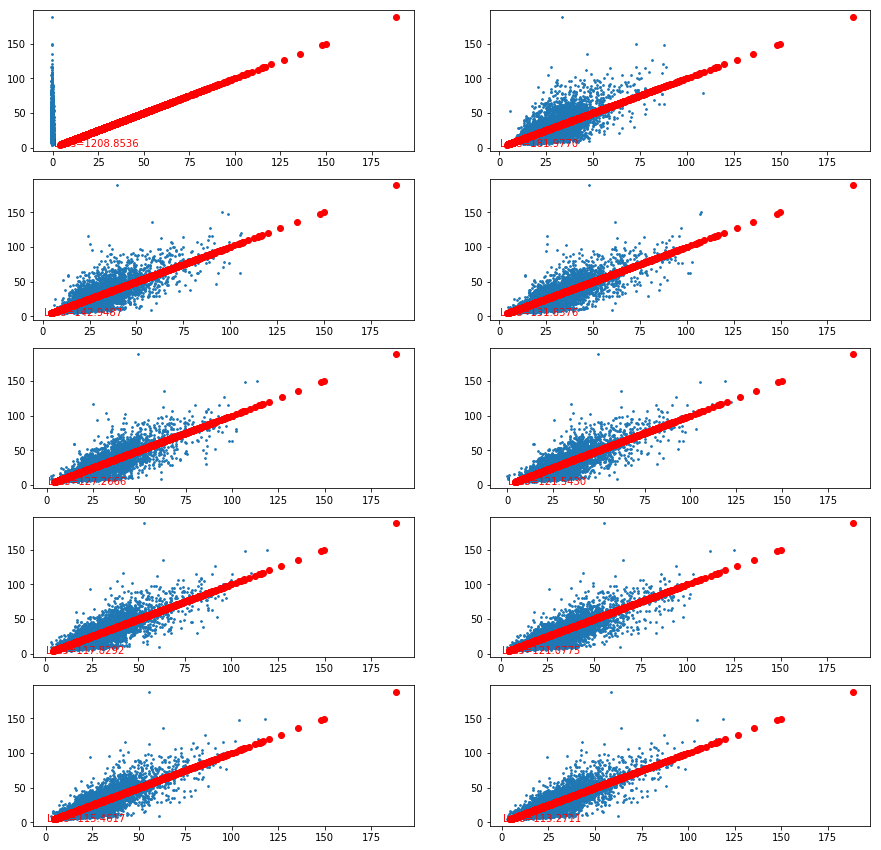

In [18]:
# 训练 10000 个 epoch

for epoch in range(10000):
    
    y_pred = net(x)
    loss = criterion(y_pred, y)    # 计算 loss
    
    optimizer.zero_grad()          # 重置梯度
    loss.backward()                # 反向传播
    optimizer.step()               # 更新权重
    
    # 每 1000 个 epoch 打印下 预测值 和 真实值 的分布
    if epoch % 1000 == 0:
        plt.subplot(5, 2, (epoch/1000)+1)
        plt.scatter(y_pred.data.cpu().numpy(), y.data.cpu().numpy(), s=3)
        plt.plot(y.data.cpu().numpy(), y.data.cpu().numpy(), 'ro', lw=2)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 10, 'color':  'red'}, position=(0.5, 0.5))

# 可以看到 loss 在逐渐减少, 并且可见 预测值分布 在逐渐靠近真实值

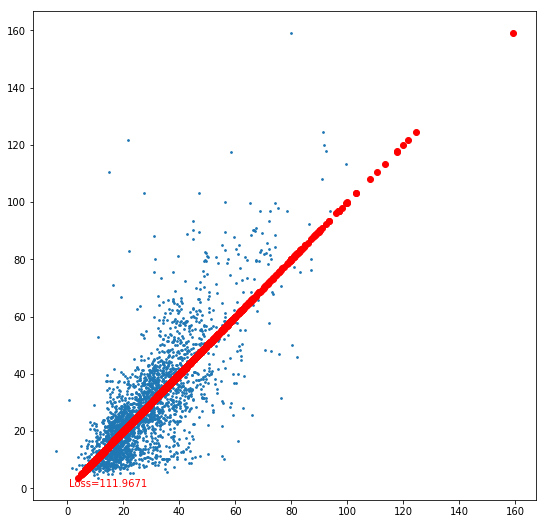

In [19]:
plt.rcParams['figure.figsize'] = (9,9)

# 模型在测试数据集上的表现

y_test_pred = net(x_test)
plt.scatter(y_test_pred.data.cpu().numpy(), y_test.data.cpu().numpy(), s=3)
plt.plot(y_test.data.cpu().numpy(), y_test.data.cpu().numpy(), 'ro', lw=2)
plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 10, 'color':  'red'}, position=(0.5, 0.5))

# 可以看到跟训练集时差距不大